<a href="https://colab.research.google.com/github/yashromakarona/myCodePractice/blob/main/dl_03_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

fatal: destination path 'data' already exists and is not an empty directory.


In [23]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.2426 - loss: 41.8674 - val_accuracy: 0.2538 - val_loss: 31.8559
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2472 - loss: 28.9354 - val_accuracy: 0.2538 - val_loss: 21.5626
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2489 - loss: 19.7853 - val_accuracy: 0.2538 - val_loss: 15.0530
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2467 - loss: 13.9713 - val_accuracy: 0.2538 - val_loss: 10.4790
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2472 - loss: 9.5588 - val_accuracy: 0.2538 - val_loss: 6.6483
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2482 - loss: 5.9016 - val_accuracy: 0.2538 - val_loss: 3.7394
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2531 - loss: 3.1936 - val_accuracy: 0.2538 - val_loss: 1.8196
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2708 - loss: 1.4773 - val_accuracy: 0.5231 - val_loss

In [25]:
modelpath = "./data/model/{epoch:02d}-{val_accuracy:.4f}.keras"
chechpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[chechpointer])

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


Epoch 1: saving model to ./data/model/01-0.9362.keras

Epoch 2: saving model to ./data/model/02-0.9362.keras

Epoch 3: saving model to ./data/model/03-0.9362.keras

Epoch 4: saving model to ./data/model/04-0.9362.keras

Epoch 5: saving model to ./data/model/05-0.9369.keras

Epoch 6: saving model to ./data/model/06-0.9369.keras

Epoch 7: saving model to ./data/model/07-0.9362.keras

Epoch 8: saving model to ./data/model/08-0.9369.keras

Epoch 9: saving model to ./data/model/09-0.9377.keras

Epoch 10: saving model to ./data/model/10-0.9385.keras

Epoch 11: saving model to ./data/model/11-0.9385.keras

Epoch 12: saving model to ./data/model/12-0.9377.keras

Epoch 13: saving model to ./data/model/13-0.9385.keras

Epoch 14: saving model to ./data/model/14-0.9392.keras

Epoch 15: saving model to ./data/model/15-0.9392.keras

Epoch 16: saving model to ./data/model/16-0.9408.keras

Epoch 17: saving model to ./data/model/17-0.9392.keras

Epoch 18: saving model to ./data/model/18-0.9392.keras



In [26]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=1, validation_split=0.25)

hist_df = pd.DataFrame(history.history)
hist_df

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9578 - loss: 0.1257 - val_accuracy: 0.9562 - val_loss: 0.1110
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9611 - loss: 0.1080 - val_accuracy: 0.9585 - val_loss: 0.1067
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9629 - loss: 0.1090 - val_accuracy: 0.9554 - val_loss: 0.1082
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9599 - loss: 0.1056 - val_accuracy: 0.9677 - val_loss: 0.1003
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9637 - loss: 0.0986 - val_accuracy: 0.9685 - val_loss: 0.0992
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9656 - loss: 0.0986 - val_accuracy: 0.9708 - val_loss: 0.1006
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9682 - loss: 0.1021 - val_accuracy: 0.9731 - val_loss: 0.0962
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9689 - loss: 0.1035 - val_accuracy: 0.9685 - v

,accuracy,loss,val_accuracy,val_loss
0,0.959199,0.115160,0.956154,0.111016
1,0.962279,0.108387,0.958462,0.106654
2,0.964332,0.107105,0.955385,0.108198
3,0.964075,0.104706,0.967692,0.100312
4,0.965101,0.102313,0.968462,0.099199
...,...,...,...,...
1995,0.992815,0.026327,0.988462,0.051895
1996,0.992045,0.026511,0.987692,0.056692
1997,0.989736,0.032384,0.988462,0.048196
1998,0.991532,0.030913,0.986154,0.050092


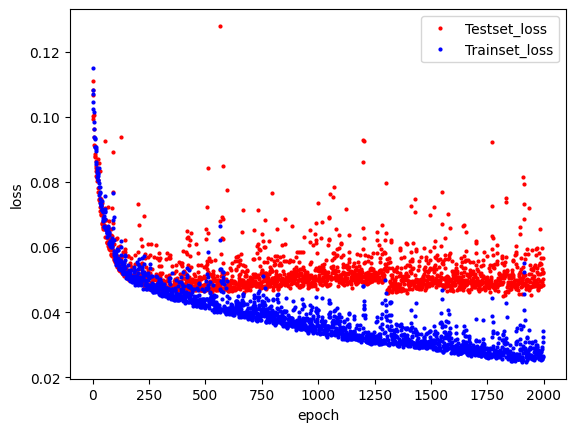

In [27]:
y_vloss = hist_df['val_loss']

y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [30]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = "./data/model/Ch14-4-bestmodel.keras"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, chechpointer])

Epoch 1/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9940 - loss: 0.0272
Epoch 1: saving model to ./data/model/01-0.9885.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9916 - loss: 0.0311 - val_accuracy: 0.9885 - val_loss: 0.0467
Epoch 2/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9880 - loss: 0.0372
Epoch 2: saving model to ./data/model/02-0.9869.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9869 - val_loss: 0.0493
Epoch 3/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9940 - loss: 0.0227
Epoch 3: saving model to ./data/model/03-0.9877.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9930 - loss: 0.0233 - val_accuracy: 0.9877 - val_loss: 0.0483
Epoch 4/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9980 - loss: 0.0060
Epoch 4: saving model to ./data/model/04-0.9877.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9877 - val_l